In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import zipfile
import seaborn as sns

In [2]:
!pip install wget

In [3]:
import wget
URL = "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"
response = wget.download(URL, "nlp_getting_started.zip")

100% [........................................................] 607343 / 607343

In [4]:
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()
# Unzip data
unzip_data("nlp_getting_started.zip")

In [5]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()
train_df = train_df.sample(frac=1, random_state=42)

In [6]:
train_df.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
from sklearn.model_selection import train_test_split
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df["text"].to_numpy(),
                                                                            train_df["target"].to_numpy(),
                                                                            test_size=0.1,random_state=42)

In [8]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("Bayes_Classifier", MultinomialNB()) # model the text
])

In [10]:
model.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Bayes_Classifier', MultinomialNB())])

In [11]:
val_pred = model.predict(val_sentences)

In [12]:
from sklearn.metrics import classification_report as cr 
from sklearn.metrics import confusion_matrix as cm

In [13]:
print(cr(val_labels,val_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762



In [14]:
print(cm(val_labels,val_pred))

[[386  28]
 [130 218]]


[Text(0, 0.5, 'No Disaster'), Text(0, 1.5, 'Disaster')]

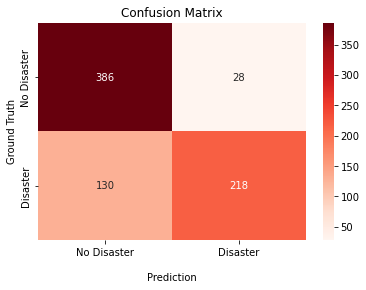

In [15]:
confusion_matrix = cm(val_labels,val_pred)
ax = sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix");
ax.set_xlabel('\nPrediction')
ax.set_ylabel('Ground Truth');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Disaster','Disaster'])
ax.yaxis.set_ticklabels(['No Disaster','Disaster'])

In [22]:
text = "Marriage"

pred = model.predict([text])

In [23]:
if pred[0]==0:
    print("The given statement is not related to a disaster")
else :
    print("The given statement is related to a disater")

The given statement is related to a disater
